#importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.info()
#no null values are found in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
len(df.country.unique())
#no country is repeated

167

In [ ]:
df.duplicated().sum()#again,no duplicate data

0

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


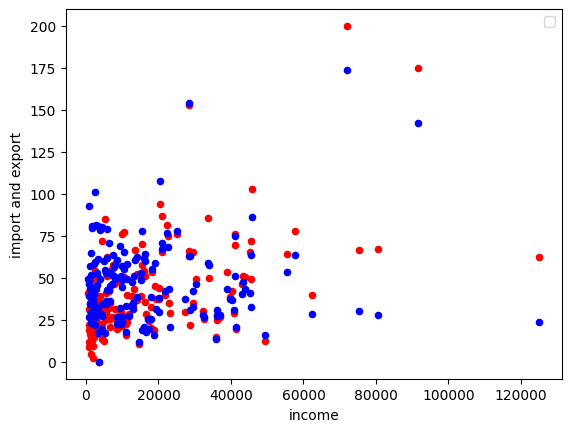

In [ ]:
ax1 = df.plot(kind='scatter', x='income', y='exports', color='r')
ax2 = df.plot(kind='scatter', x='income', y='imports', color='b', ax=ax1)
plt.ylabel('import and export')
plt.legend()

<Axes: ylabel='health'>

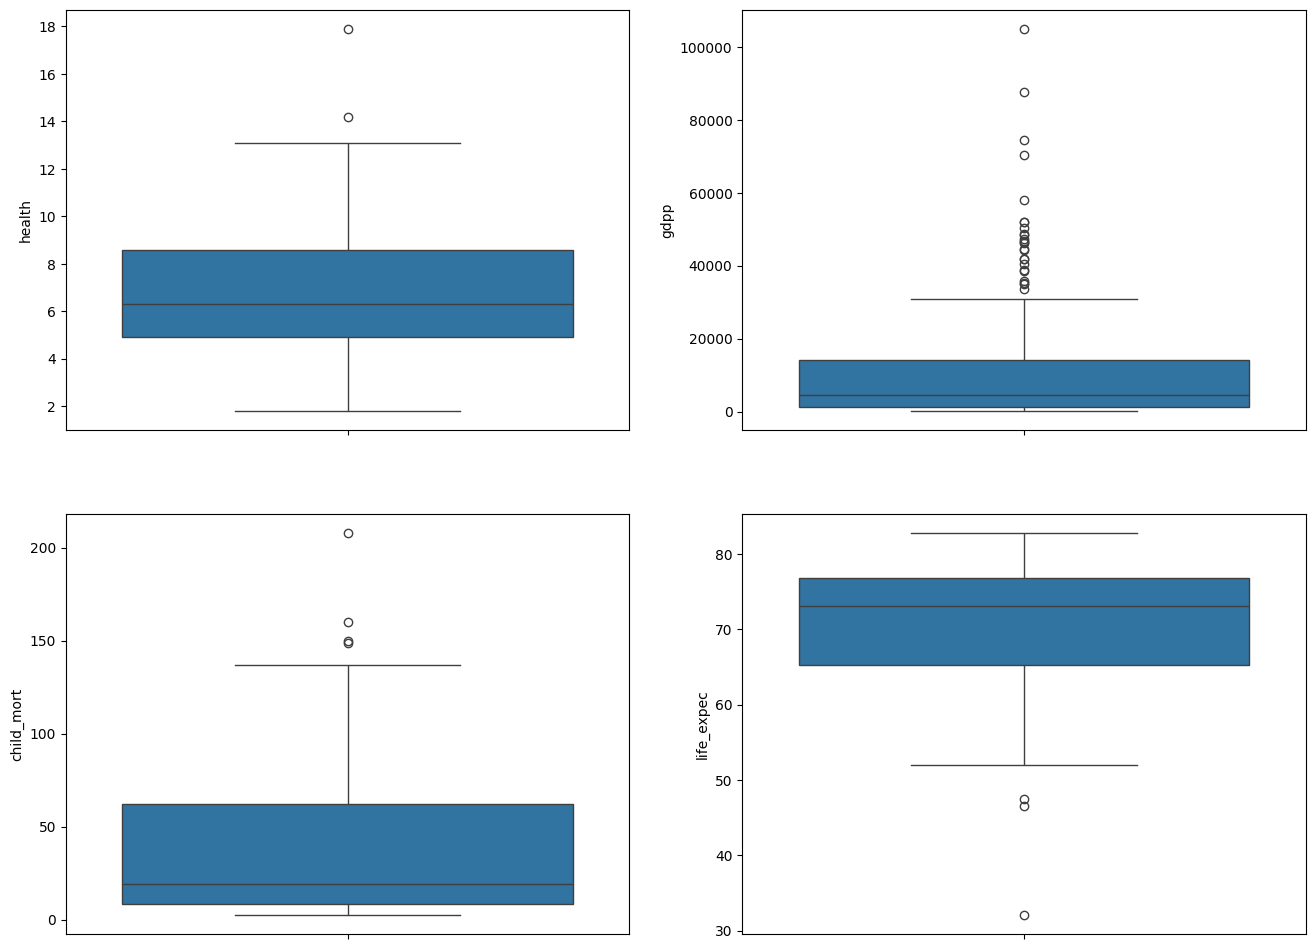

In [ ]:
#finding outliers in our data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(df.life_expec)
sns.boxplot(df.gdpp, ax = axes[0,1])
sns.boxplot(df.child_mort, ax = axes[1,0])
sns.boxplot(df.health, ax = axes[0,0])

#removing noisy data

In [ ]:

df = df[df['income']<100000]
df = df[(df['imports']<125)&(df['exports']<125)]
df = df[df['life_expec']>50]
df = df[df['health']<14]
df = df[df['gdpp']<80000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     157 non-null    object 
 1   child_mort  157 non-null    float64
 2   exports     157 non-null    float64
 3   health      157 non-null    float64
 4   imports     157 non-null    float64
 5   income      157 non-null    int64  
 6   inflation   157 non-null    float64
 7   life_expec  157 non-null    float64
 8   total_fer   157 non-null    float64
 9   gdpp        157 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.5+ KB


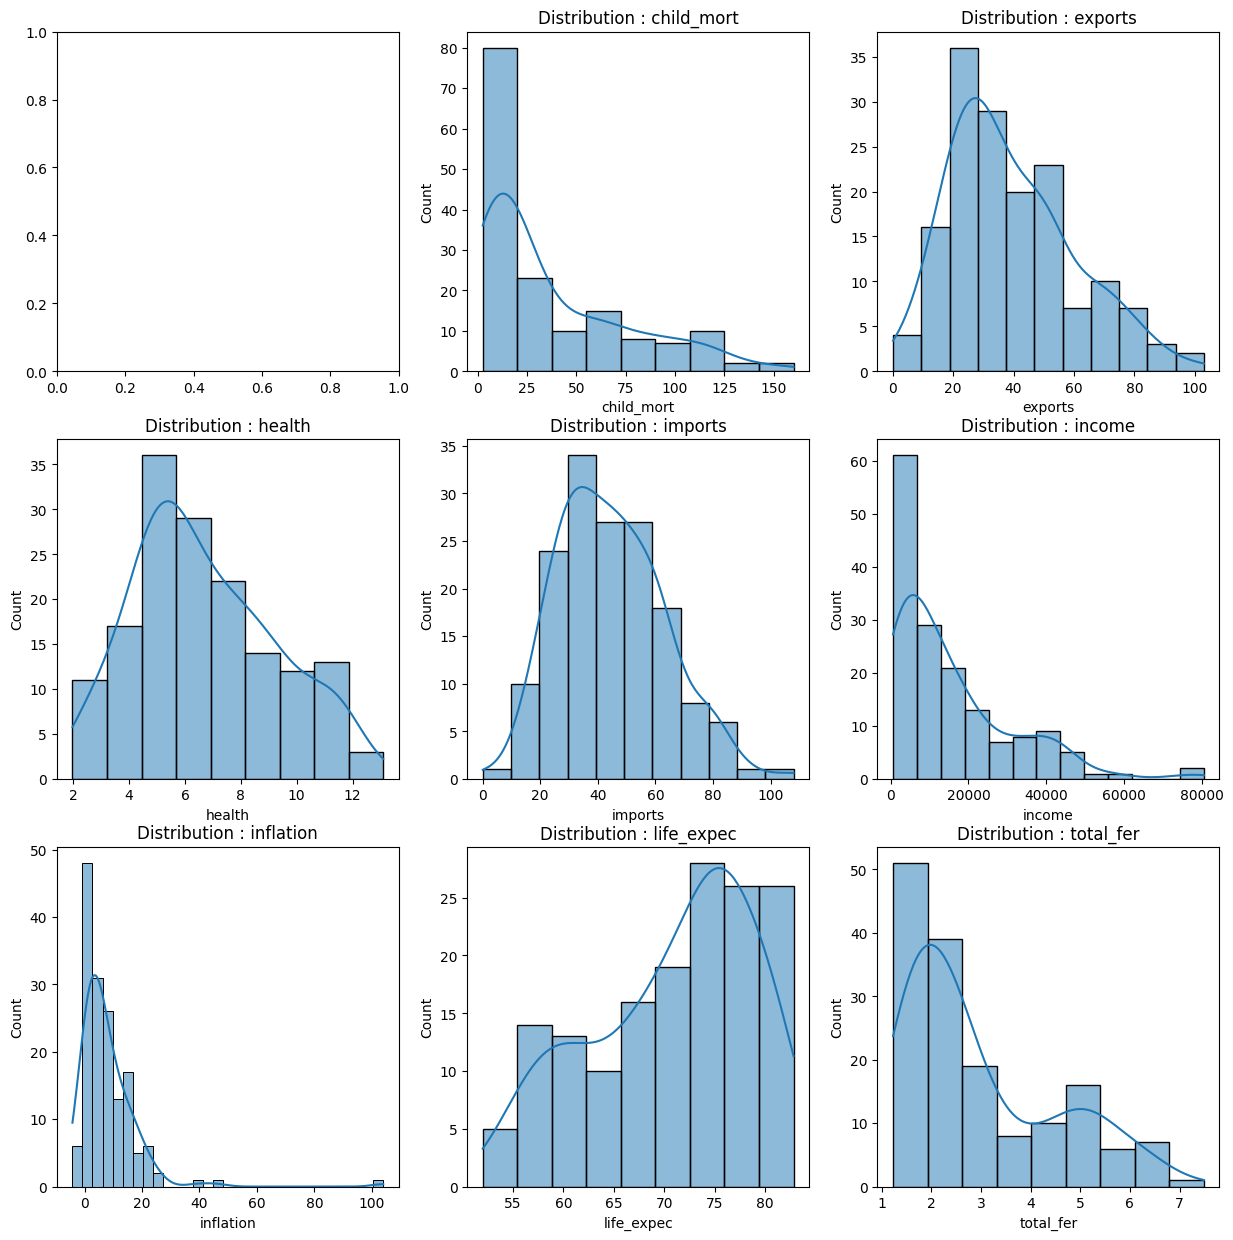

In [ ]:
col = df.columns
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(1, 9):  # Number of the numerical features = 8
    plt.subplot(3,3,i+1)
    sns.histplot(df[col[i]], kde=True)
    title = 'Distribution : ' + col[i]
    plt.title(title)


#Health data follows a normal distribution.
#Life-exp is skewed to the left.
#The rest are skewed to the right.

In [ ]:
df1 = df.drop(columns='country')
df2 = df1.copy()
scaler = StandardScaler()
minmax = MinMaxScaler()
df2['health'] = scaler.fit_transform(df2[['health']])#health was normal so just standardise
col_without_health = df1.drop('health', axis = 1)#other columns need to be normalised

for i in col_without_health.columns:
    df2[i] = minmax.fit_transform(df2[[i]])

<Axes: >

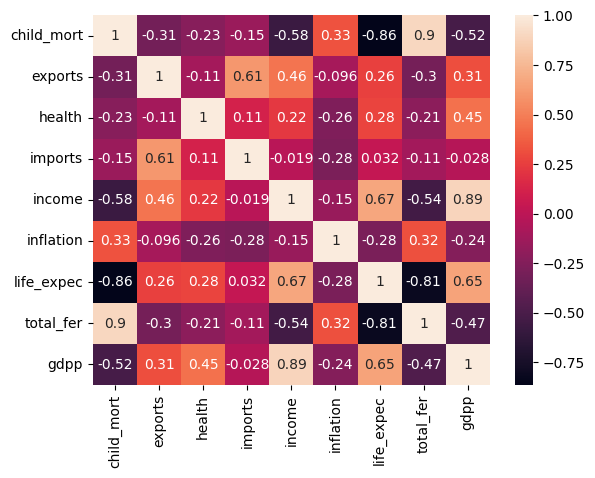

In [ ]:
dfc = df1.corr()
sns.heatmap(dfc,annot=True)

#applying PCA

In [ ]:
pca = PCA()
pca.fit(df2)

PCA()

Text(0, 0.5, 'Cumulative Explained Varience')

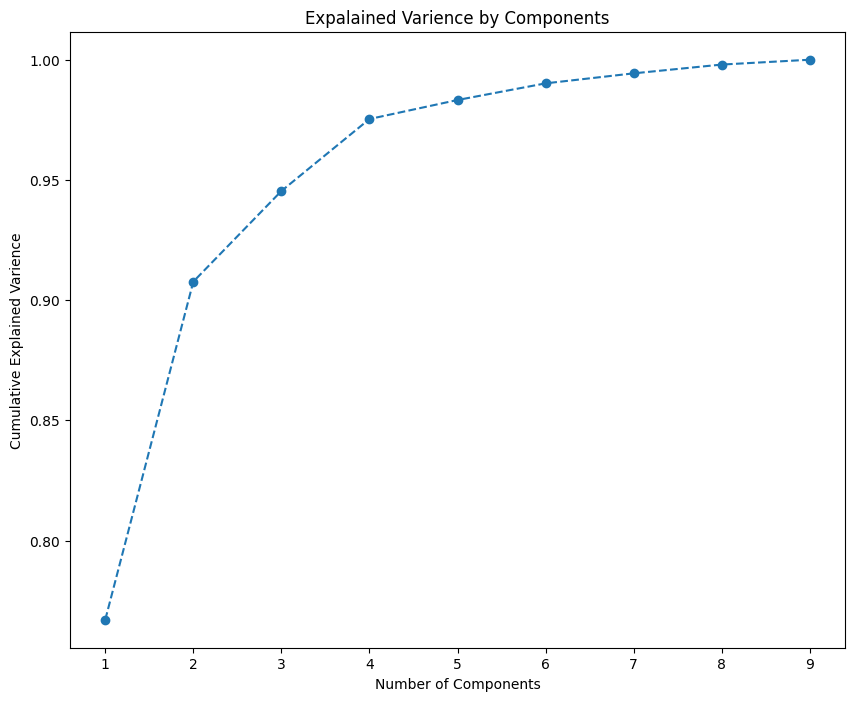

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Expalained Varience by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Varience")

In [ ]:
# 3 components is chosen according to previous graph
pca = PCA(n_components =3)
pca.fit(df2)

PCA(n_components=3)

In [ ]:
scores_pca = pca.transform(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

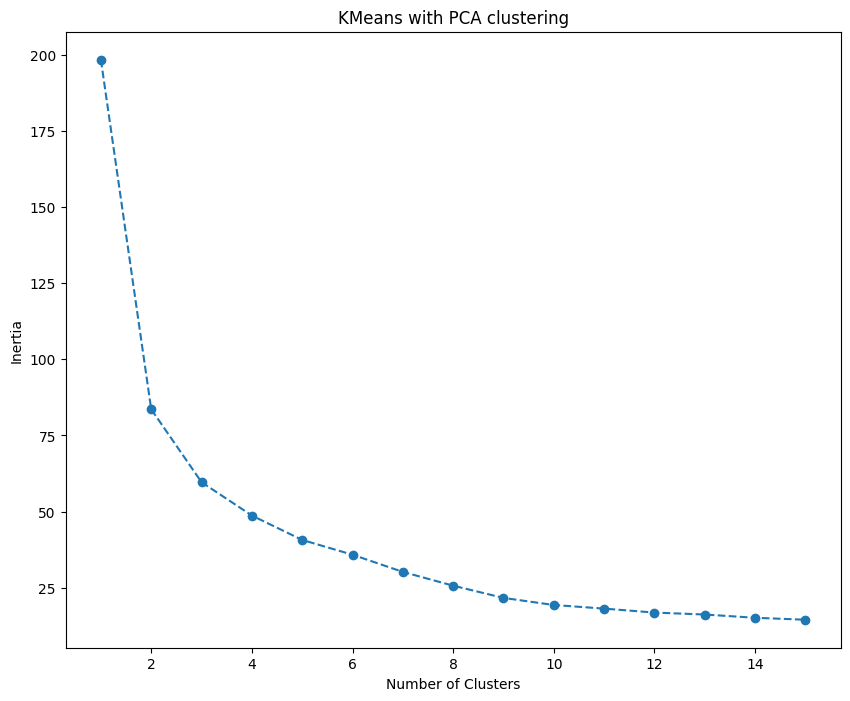

In [ ]:
inertia = []

for i in range (1, 16):
    kmeans = KMeans(n_clusters = i, max_iter = 500,  init = 'random', random_state = 42)
    kmeans.fit(scores_pca)
    inertia.append(kmeans.inertia_)
plt.figure(figsize = (10, 8))
plt.plot(range(1, 16), inertia, marker = 'o', linestyle = '--')
plt.title("KMeans with PCA clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")#elbowpoint is 3

In [ ]:
km = KMeans(n_clusters=3,init='random',n_init=50,random_state=0)
y_km = km.fit_predict(scores_pca)

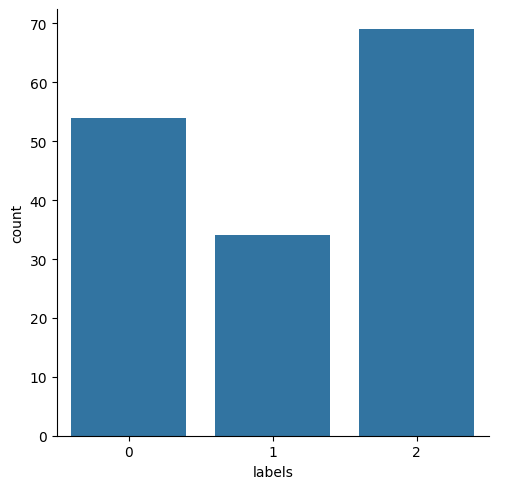

In [ ]:
labels = km.labels_

df['labels'] = labels
sns.catplot(x='labels', kind='count', data=df)

In [ ]:
centroids = km.cluster_centers_
print(centroids)

[[ 0.19968296  0.02147345  0.01641429]
 [ 1.52760969 -0.09617955 -0.01626378]
 [-0.90900882  0.03058751 -0.00483193]]


In [ ]:
df_0 = df[df['labels'] == 0]
df_1 = df[df['labels'] == 1]
df_2 = df[df['labels'] == 2]

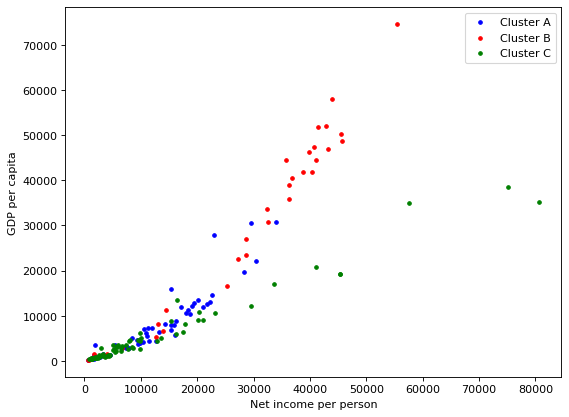

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_0['income'], df_0['gdpp'], c='blue', s=10, label='Cluster A')
plt.scatter(df_1['income'], df_1['gdpp'], c='red', s=10, label='Cluster B')
plt.scatter(df_2['income'], df_2['gdpp'], c='green', s=10, label='Cluster C')

plt.xlabel('Net income per person')
plt.ylabel('GDP per capita')
plt.legend()

In [ ]:
import plotly.express as px

In [ ]:
description = df.groupby("labels").agg({'child_mort': 'mean',
                                        'exports': 'mean',
                                        'health': 'mean',
                                        'imports': 'mean',
                                        'income': 'mean',
                                        'inflation': 'mean',
                                        'life_expec': 'mean',
                                        'total_fer': 'mean',
                                        'gdpp': 'mean'})

n_clients = df.groupby('labels').size()

description['n_clients'] = n_clients
print(description)


        child_mort    exports     health    imports        income  inflation  \
labels                                                                         
0        31.711111  39.712963   7.218704  47.729630  12454.425926   6.251944   
1        19.061765  37.591765  10.459412  45.864706  27030.117647   3.055029   
2        50.753623  39.277957   4.449710  41.776317  12096.985507  11.900377   

        life_expec  total_fer          gdpp  n_clients  
labels                                                  
0        71.000000   2.852037   7911.833333         54  
1        76.417647   2.175294  28279.411765         34  
2        67.762319   3.463043   5680.246377         69  


Cluster's description:

#Cluster C:

Highest death of children under 5 years of age per 1000 live births
Highest Inflation

Lowest total health spending per capita.

Lowest per capita income

Lowest life expectation

Lowest GDP per capita.

#Cluster B:

Lowest death of children under 5 years of age per 1000 live births

Highest total health spending per capita.

Highest Net income per person

Lowest Inflation

Highest life expectation

Highest The GDP per capita.

#Cluster A:

Highest exports of goods and services per capita.

Highest imports of goods and services per capita

In [ ]:
df['developement']=y_km
df.loc[df['developement']==0,'developement']='developing'
df.loc[df['developement']==1,'developement']='developed'
df.loc[df['developement']==2,'developement']='underdeveloped'
df.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,developement
155,Uganda,81.0,17.1,9.01,28.6,1540,10.600,56.8,6.15,595,0,developing
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800,1,developed
92,"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.040,74.0,1.47,4540,0,developing
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,2,underdeveloped
69,India,58.8,22.6,4.05,27.1,4410,8.980,66.2,2.60,1350,2,underdeveloped


In [ ]:
clusters_name = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C'}
df['labels'] = df['labels'].map(clusters_name)

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='labels',
                    title='Coutries by labels'
                   )
fig.show()

In [ ]:

df[df['developement']=='underdeveloped']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,developement
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Cluster C,underdeveloped
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Cluster C,underdeveloped
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,Cluster C,underdeveloped
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700,Cluster C,underdeveloped
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,Cluster C,underdeveloped
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,Cluster C,underdeveloped
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Cluster C,underdeveloped
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Cluster C,underdeveloped
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Cluster C,underdeveloped


#these 69 countries are the ones which are in most need of help